# Simple Linear Regression model building steps.
1. Reading and understanding the data
2. Training the model
3. Residual analysis, plot residuals and analyse and validate that residuals should be normally distributed.
4. Predicting and evaluate the model on test set.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split




In [23]:
from sklearn.metrics import mean_squared_error      
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [7]:
# 1.read dataframe from advertising.csv



df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.shape

(200, 4)

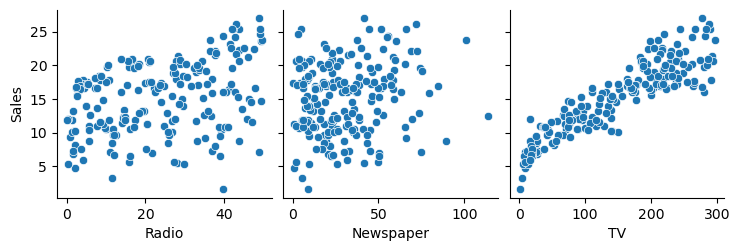

In [9]:
sns.pairplot(data=df, x_vars=('Radio', 'Newspaper', 'TV'), y_vars=('Sales'))

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

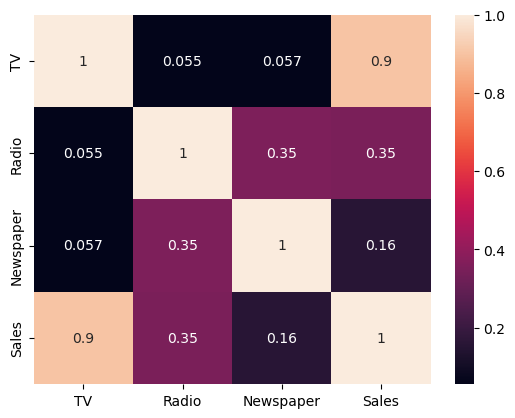

In [11]:
#create a heatmap using seaborn
sns.heatmap(df.corr(), annot=True)


## 2.Building a Model now.
- cereate X and y
- Create train and test sets
- Create model
- Train on train set
- test on test set


In [12]:
X = df['TV'] # can be multiple
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70, random_state=100)

In [13]:
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [14]:
#This is creating instance of model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params


const    6.948683
TV       0.054546
dtype: float64

In [15]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        10:42:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. coef and p-value
2. R squared is 81.5 is high which is good.
3. p(F-statistics) is low that means the fit is not by chance but due to a good coorelation

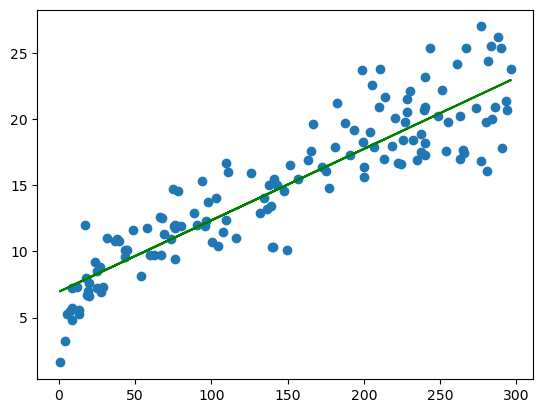

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train,6.948+0.054*X_train, 'g') # instead of caluclations it can begiven y_train_pred.. created next

## 3.Residual

In [17]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train-y_train_pred

C:\Users\Admin\AppData\Local\Temp\ipykernel_2420\973735134.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'Residual')

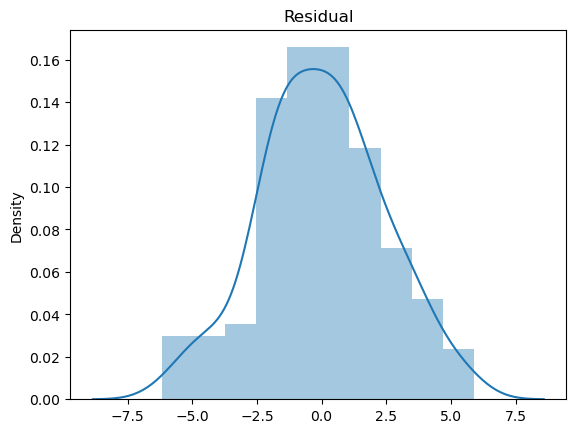

In [18]:
#plotting the residual
plt.figure()
sns.distplot(res)
plt.title('Residual')


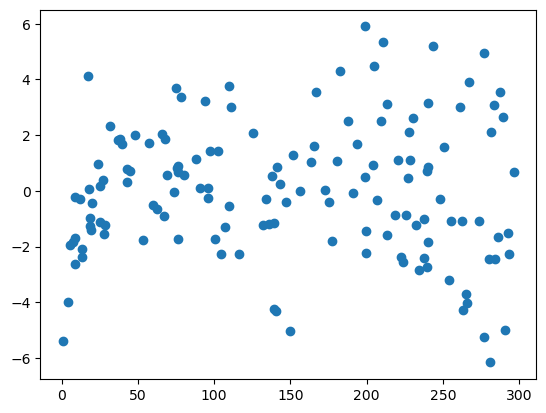

In [19]:
plt.scatter(X_train, res)
plt.show()

## 4.Prediction and Evaluation of the model 
    a.predict on test set (y_test)
    b. evaluate the model using r squared. 

In [20]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)


In [21]:
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

# Creating model in sklearn
- Create an obj of linear reg
- fit the model


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70, random_state=100)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [27]:

lm = LinearRegression()
lm.fit(X_train_lm,y_train)

LinearRegression()

Should be same as previous model coef and intercept

In [28]:
lm.coef_

array([0.05454575])

In [29]:
lm.intercept_

6.948683200001357

## Evaluating this new model - comparing with y train and test using R square

In [30]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm )

In [31]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
